<a href="https://colab.research.google.com/github/tankien76/CS331.L21/blob/main/VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount gg drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Data/Dataset.zip -d Dataset

In [3]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg19 import preprocess_input
from keras.applications.vgg19 import decode_predictions
from keras.applications.vgg19 import VGG19
from keras.models import Model
from pickle import dump

In [4]:
model = VGG19()
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
model.summary()

574717952/574710816 [==============================] - 5s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [5]:
#model1 = VGG19()
model1 = Model(inputs=model.inputs, outputs=model.layers[-2].output)
model1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [6]:
# get feature from model
def getFeature(imagePath, model):
  # preprocess image
  image = load_img(imagePath,target_size=(224,224))
  img_array = img_to_array(image)
  img_array = np.expand_dims(img_array, axis=0)

  # get feature 
  feature = model.predict(img_array)
  feature = feature.reshape(-1)

  return feature

In [7]:
# feature extraction
def featureExtraction(imageDir, model):
  imagePaths = list(paths.list_images(imageDir))

  features = []
  labels = []

  for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    features.append(getFeature(imagePath,model))

    if (label == "with_mask"):
      labels.append(1)
      
    else:
      labels.append(0)

  return np.array(features),np.array(labels)

In [8]:
from imutils import paths
import os
import pandas as pd
import numpy as np

In [9]:
# main function
if __name__ ==  "__main__":
  pathDir = '/content/Dataset'

  # feature extraction
  # FC1
  features_1 , labels_1 = featureExtraction(pathDir, model)

  # FC2
  features_2, labels_2 = featureExtraction(pathDir, model1)


In [10]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [11]:
feature_FC1 = features_1
feature_FC2 = features_2

labels_FC1 = labels_1
labels_FC2 = labels_2

#print(feature_FC1)
#print(feature_FC2)

In [12]:
#Tiến hành chia dữ liệu để thực hiện quá trình ra 2 phần train và test.
feature_FC1_train, feature_FC1_test, labels_FC1_train, labels_FC1_test = train_test_split(feature_FC1, labels_FC1, test_size = 0.2, random_state = 1)
feature_FC2_train, feature_FC2_test, labels_FC2_train, labels_FC2_test = train_test_split(feature_FC2, labels_FC2, test_size = 0.2, random_state = 1)

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        11
           1       1.00      0.79      0.88        29

    accuracy                           0.85        40
   macro avg       0.82      0.90      0.84        40
weighted avg       0.90      0.85      0.86        40

Confusion matrix:
[[11  6]
 [ 0 23]]


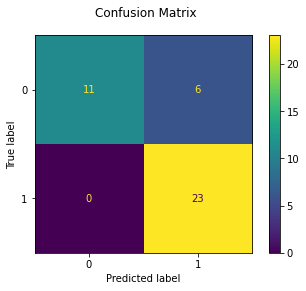

In [13]:
# tạo một bộ phân loại.
clf_FC1 = make_pipeline(StandardScaler(), SVC(gamma='auto'))

clf_FC1.fit(feature_FC1_train, labels_FC1_train)
predicted_FC1 = clf_FC1.predict(feature_FC1_test)
print(classification_report(predicted_FC1, labels_FC1_test))

# Confusion matrix
conf_FC1 = metrics.plot_confusion_matrix(clf_FC1, feature_FC1_test, labels_FC1_test)
conf_FC1.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{conf_FC1.confusion_matrix}")
plt.show()

              precision    recall  f1-score   support

           0       0.59      1.00      0.74        10
           1       1.00      0.77      0.87        30

    accuracy                           0.82        40
   macro avg       0.79      0.88      0.80        40
weighted avg       0.90      0.82      0.84        40

Confusion matrix:
[[10  7]
 [ 0 23]]


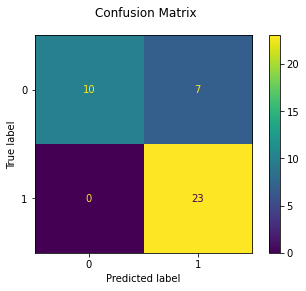

In [14]:
# tạo một bộ phân loại.
clf_FC2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))

clf_FC2.fit(feature_FC2_train, labels_FC2_train)
predicted_FC2 = clf_FC2.predict(feature_FC2_test)
print(classification_report(predicted_FC2, labels_FC2_test))

# Confusion matrix
conf_FC2 = metrics.plot_confusion_matrix(clf_FC2, feature_FC2_test, labels_FC2_test)
conf_FC2.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{conf_FC2.confusion_matrix}")
plt.show()